<a href="https://colab.research.google.com/github/infinadox/Sales-Data-Forecasting/blob/main/Sales_Data_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the datasets
store_data_url = "https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/store.csv"
test_data_url = "https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/test.csv"
train_data_url = "https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/train.csv"

store_data = pd.read_csv(store_data_url)
test_data = pd.read_csv(test_data_url)
train_data = pd.read_csv(train_data_url)

# Display the first few rows of each dataframe
print("Store Data:")
print(store_data.head())
print("\nTest Data:")
print(test_data.head())
print("\nTrain Data:")
print(train_data.head())

# Merge train and test datasets with store data
train_data = pd.merge(train_data, store_data, on='Store')
test_data = pd.merge(test_data, store_data, on='Store')

# Display the first few rows after merging
print("\nMerged Train Data:")
print(train_data.head())
print("\nMerged Test Data:")
print(test_data.head())

# Handle missing values
# Fill missing values in 'CompetitionDistance' with the median value
train_data['CompetitionDistance'].fillna(train_data['CompetitionDistance'].median(), inplace=True)
test_data['CompetitionDistance'].fillna(test_data['CompetitionDistance'].median(), inplace=True)

# Fill missing values in 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with mode values
train_data['CompetitionOpenSinceMonth'].fillna(train_data['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
train_data['CompetitionOpenSinceYear'].fillna(train_data['CompetitionOpenSinceYear'].mode()[0], inplace=True)
test_data['CompetitionOpenSinceMonth'].fillna(test_data['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
test_data['CompetitionOpenSinceYear'].fillna(test_data['CompetitionOpenSinceYear'].mode()[0], inplace=True)

# Fill missing values in 'Promo2SinceWeek' and 'Promo2SinceYear' with mode values
train_data['Promo2SinceWeek'].fillna(train_data['Promo2SinceWeek'].mode()[0], inplace=True)
train_data['Promo2SinceYear'].fillna(train_data['Promo2SinceYear'].mode()[0], inplace=True)
test_data['Promo2SinceWeek'].fillna(test_data['Promo2SinceWeek'].mode()[0], inplace=True)
test_data['Promo2SinceYear'].fillna(test_data['Promo2SinceYear'].mode()[0], inplace=True)

# Normalize numerical features
scaler = StandardScaler()
train_data[['CompetitionDistance']] = scaler.fit_transform(train_data[['CompetitionDistance']])
test_data[['CompetitionDistance']] = scaler.transform(test_data[['CompetitionDistance']])

# Convert 'Date' to datetime format and extract new features
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day
train_data['DayOfWeek'] = train_data['Date'].dt.dayofweek

test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['Day'] = test_data['Date'].dt.day
test_data['DayOfWeek'] = test_data['Date'].dt.dayofweek

# Display the first few rows after preprocessing
print("\nPreprocessed Train Data:")
print(train_data.head())
print("\nPreprocessed Test Data:")
print(test_data.head())

# Save the preprocessed data to CSV files (optional)
train_data.to_csv('/content/processed_train_data.csv', index=False)
test_data.to_csv('/content/processed_test_data.csv', index=False)

print("Data preprocessing complete. Files saved as 'processed_train_data.csv' and 'processed_test_data.csv'.")


Store Data:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  

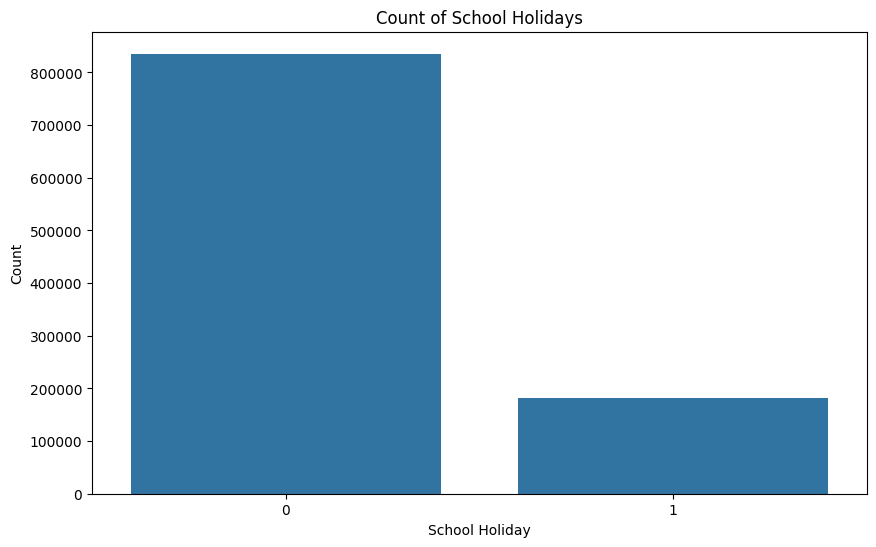

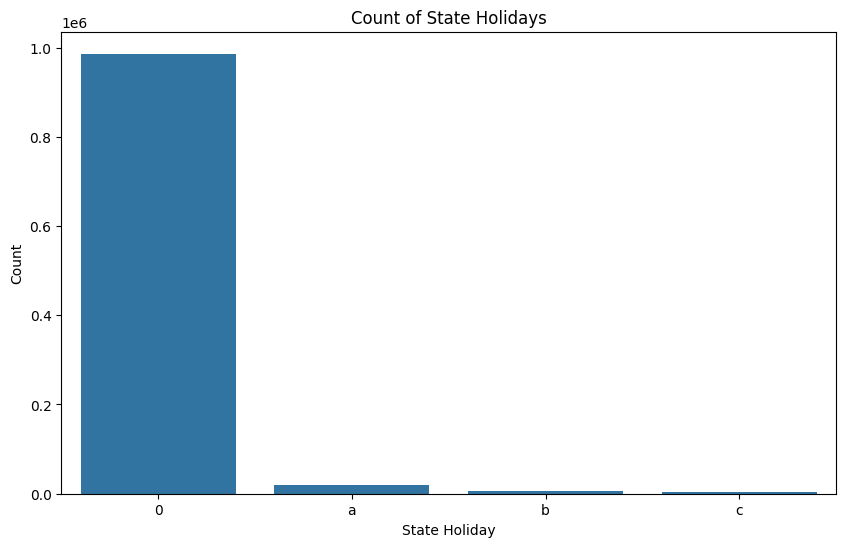

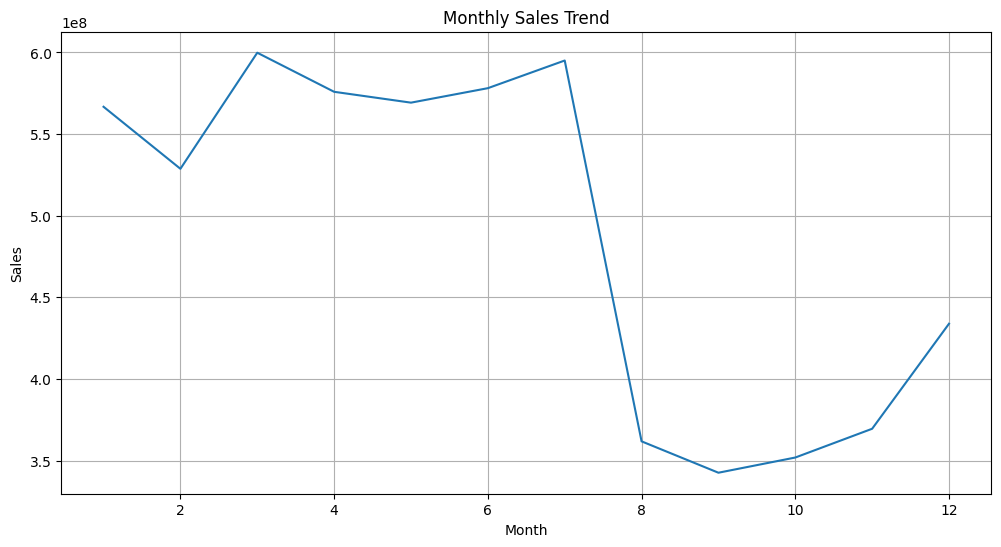

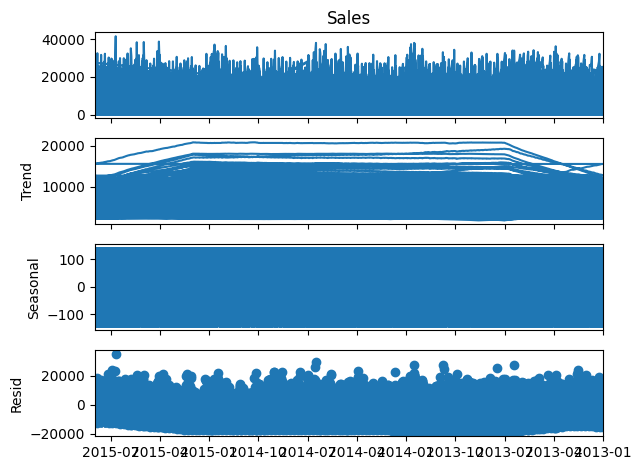

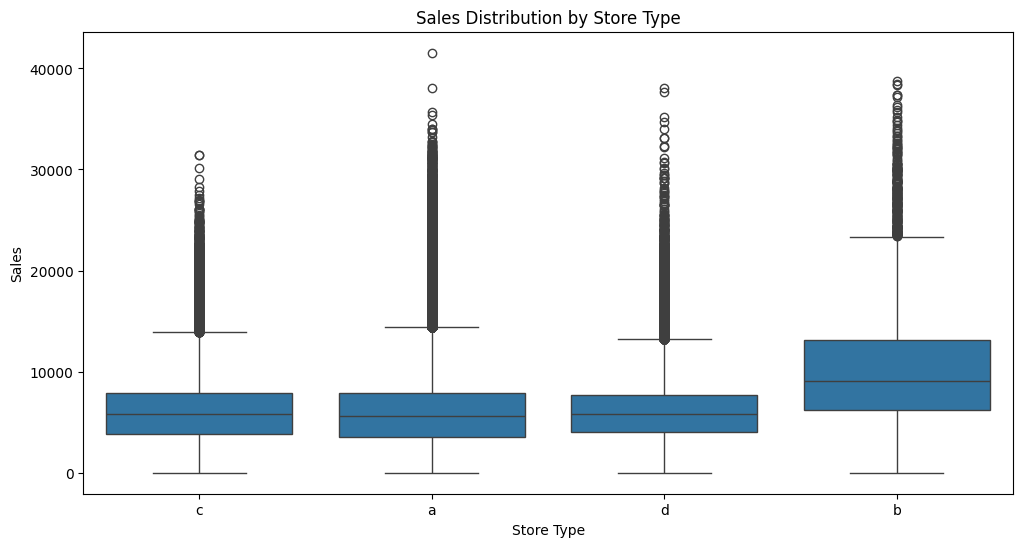

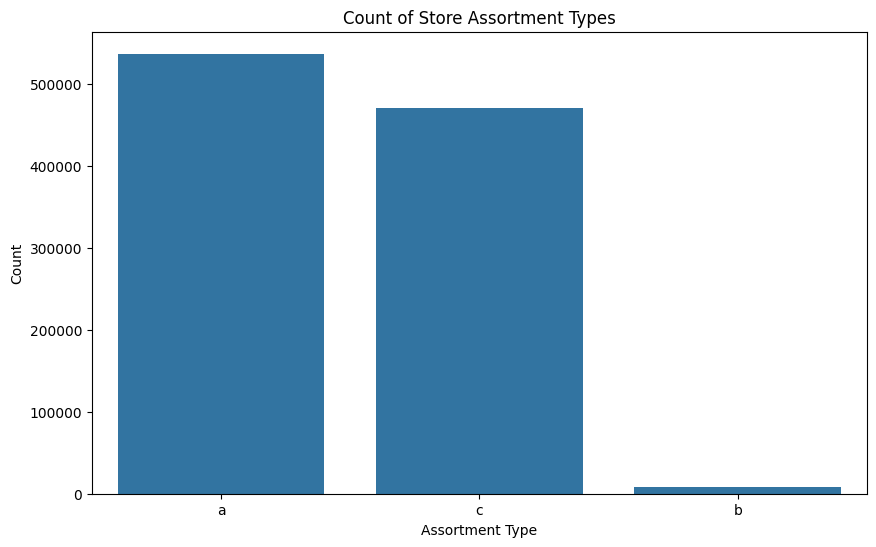

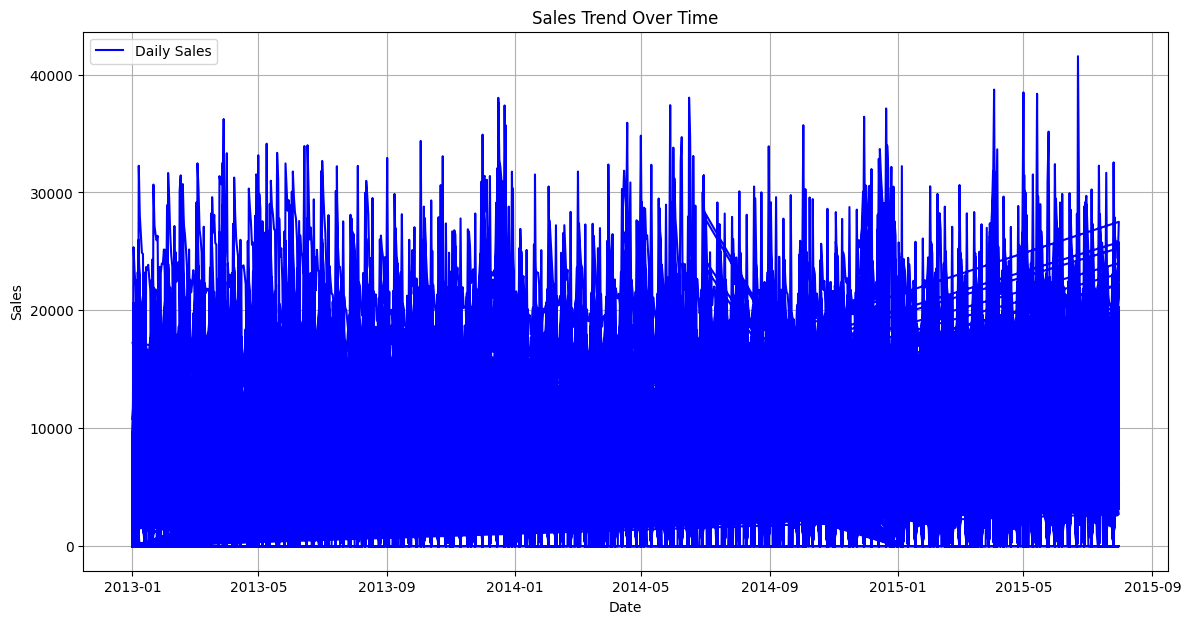

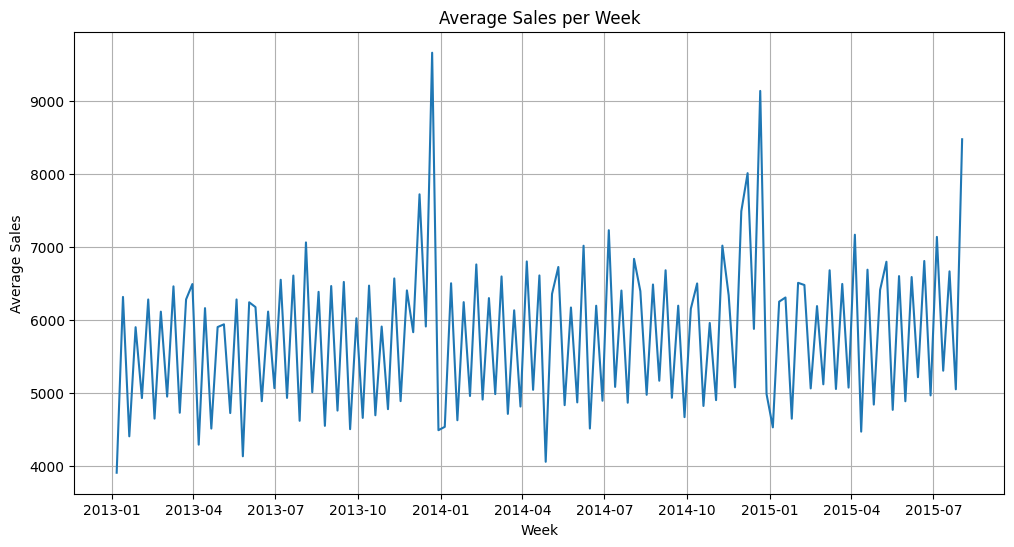

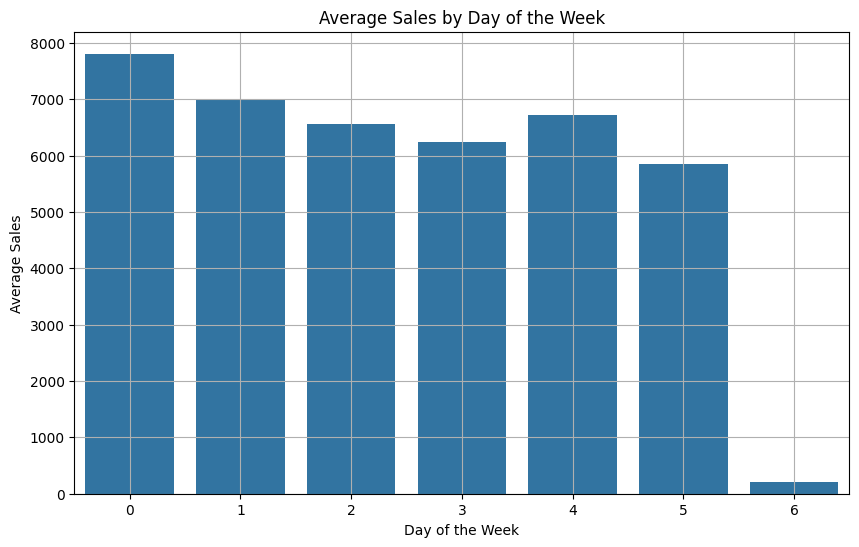

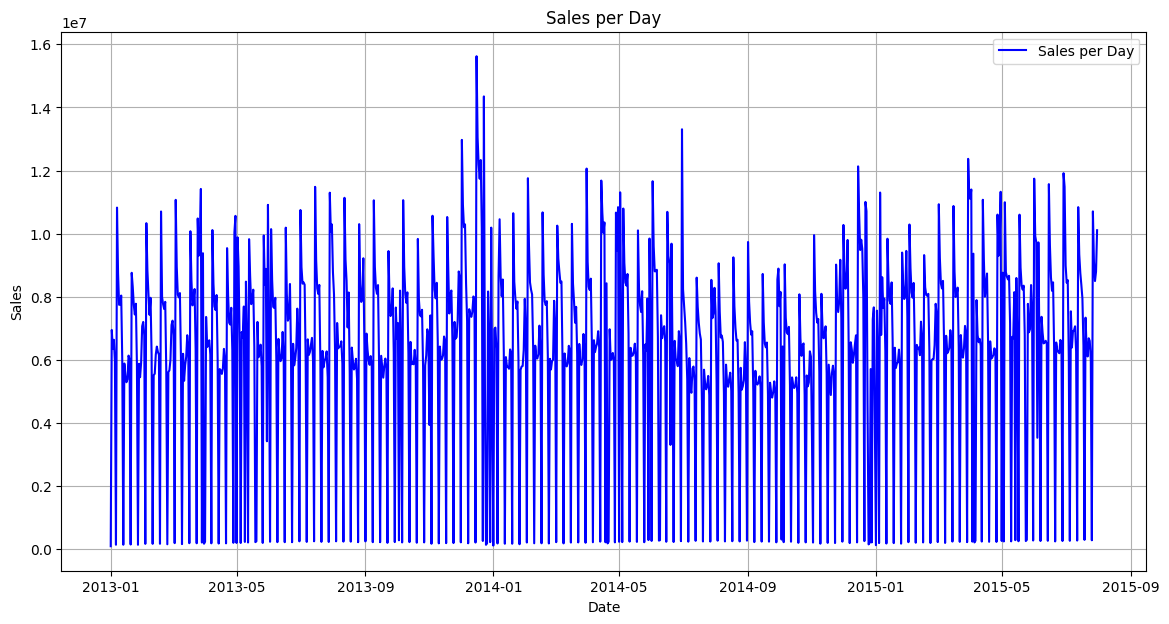

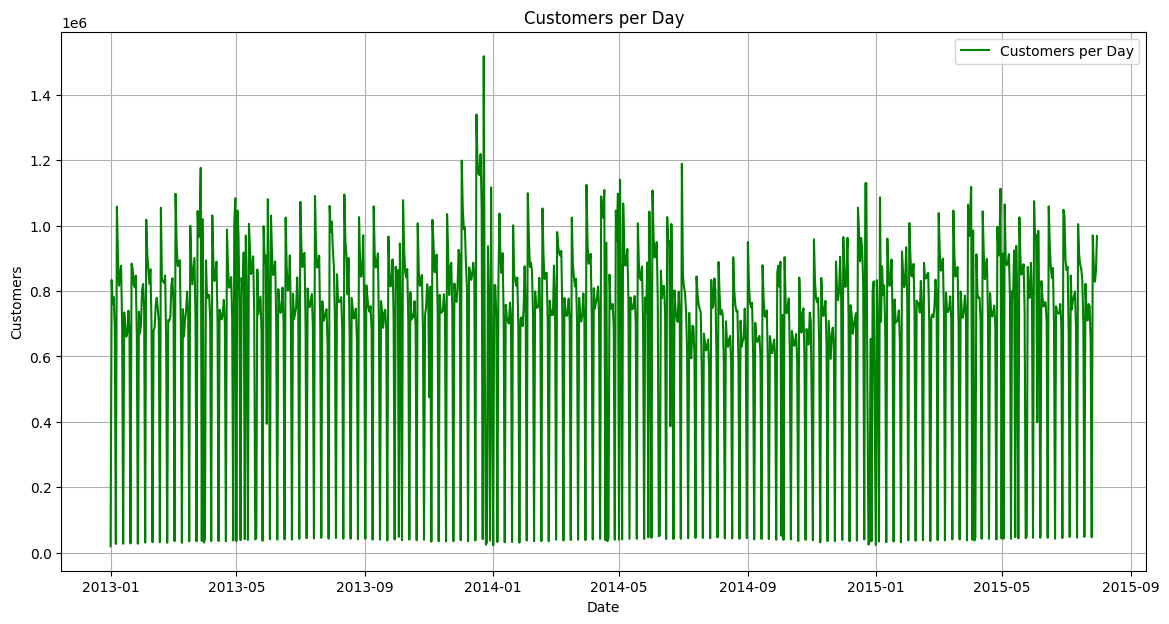

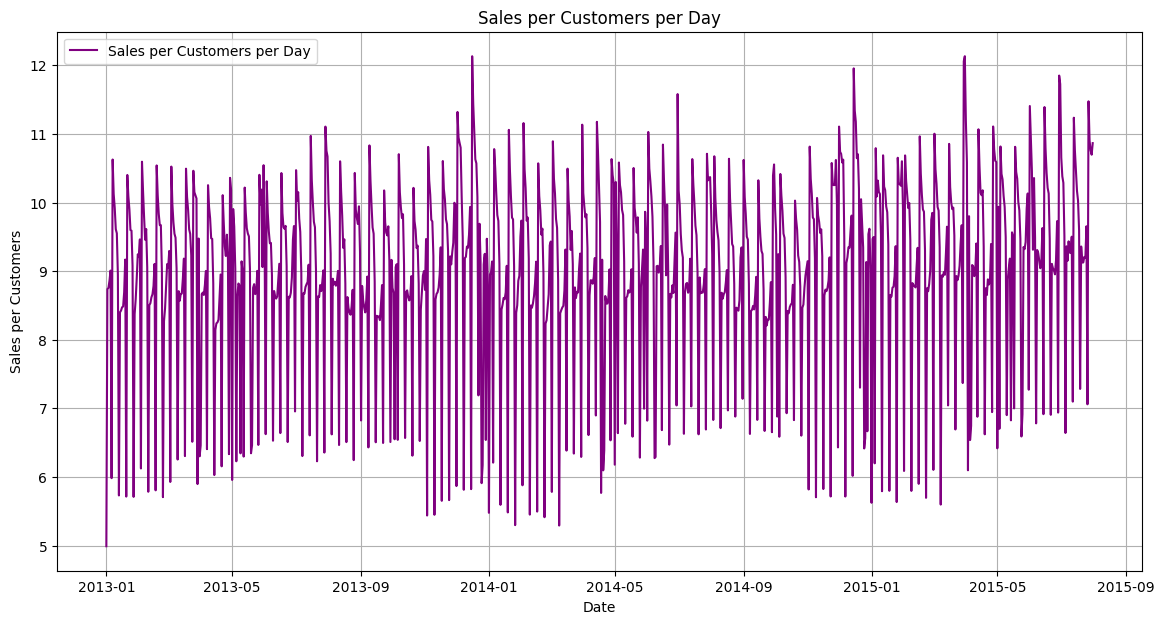

In [ ]:
#Shameer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Load the preprocessed train data
train_data = pd.read_csv('processed_train_data.csv', parse_dates=['Date'], index_col='Date')

# 1. School and State Holidays
plt.figure(figsize=(10, 6))
sns.countplot(x='SchoolHoliday', data=train_data)
plt.title('Count of School Holidays')
plt.xlabel('School Holiday')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='StateHoliday', data=train_data)
plt.title('Count of State Holidays')
plt.xlabel('State Holiday')
plt.ylabel('Count')
plt.show()

# 2. Seasonality
monthly_sales = train_data.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

result = seasonal_decompose(train_data['Sales'], model='additive', period=365)
result.plot()
plt.show()

# 3. Locality
plt.figure(figsize=(12, 6))
sns.boxplot(x='StoreType', y='Sales', data=train_data)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Assortment', data=train_data)
plt.title('Count of Store Assortment Types')
plt.xlabel('Assortment Type')
plt.ylabel('Count')
plt.show()

# 4. Sales Over Time (6 weeks)
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Sales'], label='Daily Sales', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 5. Sales per Week - Average Sales per Week
weekly_sales = train_data['Sales'].resample('W').mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title('Average Sales per Week')
plt.xlabel('Week')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

# 6. Weekday Sales (Monday - Sunday)
avg_sales_by_day = train_data.groupby('DayOfWeek')['Sales'].mean()

# Map numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')

# Replace x-axis labels with day names
plt.xticks(ticks=range(len(day_names)), labels=day_names)

plt.grid(True)
plt.show()

# 7. Sales per Day, Customers per Day, and Sales per Customers per Day
daily_sales = train_data.groupby('Date')['Sales'].sum()
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales.values, label='Sales per Day', color='blue')
plt.title('Sales per Day')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

daily_customers = train_data.groupby('Date')['Customers'].sum()
plt.figure(figsize=(14, 7))
plt.plot(daily_customers.index, daily_customers.values, label='Customers per Day', color='green')
plt.title('Customers per Day')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.show()

train_data['SalesPerCustomer'] = train_data['Sales'] / train_data['Customers']
daily_sales_per_customer = train_data.groupby('Date')['SalesPerCustomer'].mean()
plt.figure(figsize=(14, 7))
plt.plot(daily_sales_per_customer.index, daily_sales_per_customer.values, label='Sales per Customers per Day', color='purple')
plt.title('Sales per Customers per Day')
plt.xlabel('Date')
plt.ylabel('Sales per Customers')
plt.legend()
plt.grid(True)
plt.show()




   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4  2015-07-31   5263        555     1      1            0   
1      1          3  2015-07-30   5020        546     1      1            0   
2      1          2  2015-07-29   4782        523     1      1            0   
3      1          1  2015-07-28   5011        560     1      1            0   
4      1          0  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType  ... CompetitionDistance  \
0              1         c  ...           -0.538742   
1              1         c  ...           -0.538742   
2              1         c  ...           -0.538742   
3              1         c  ...           -0.538742   
4              1         c  ...           -0.538742   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0

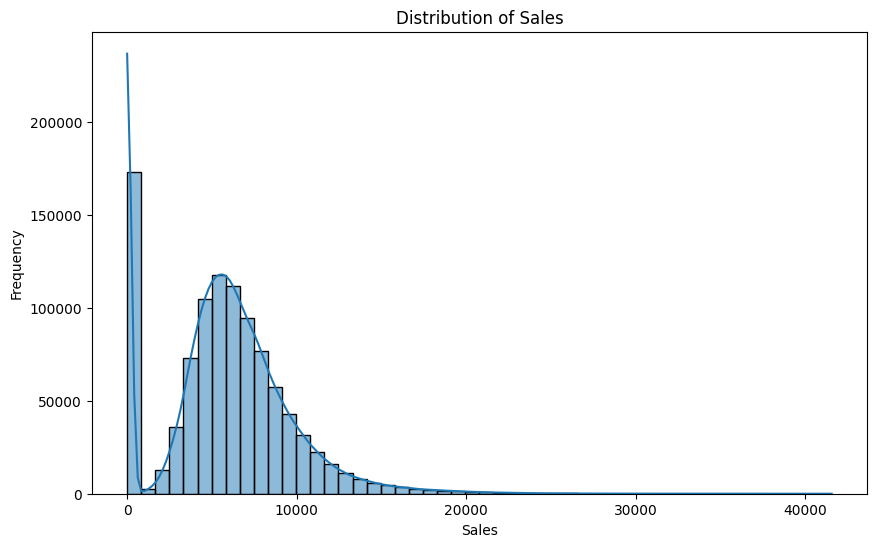

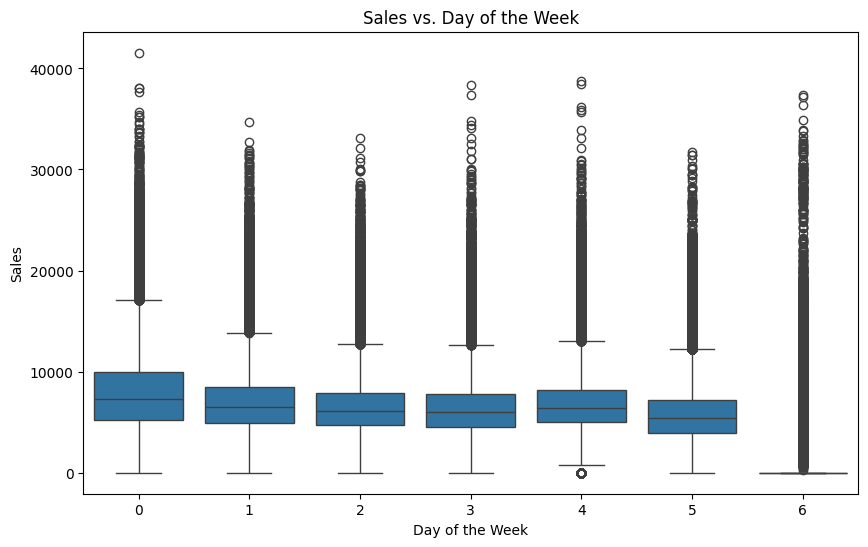

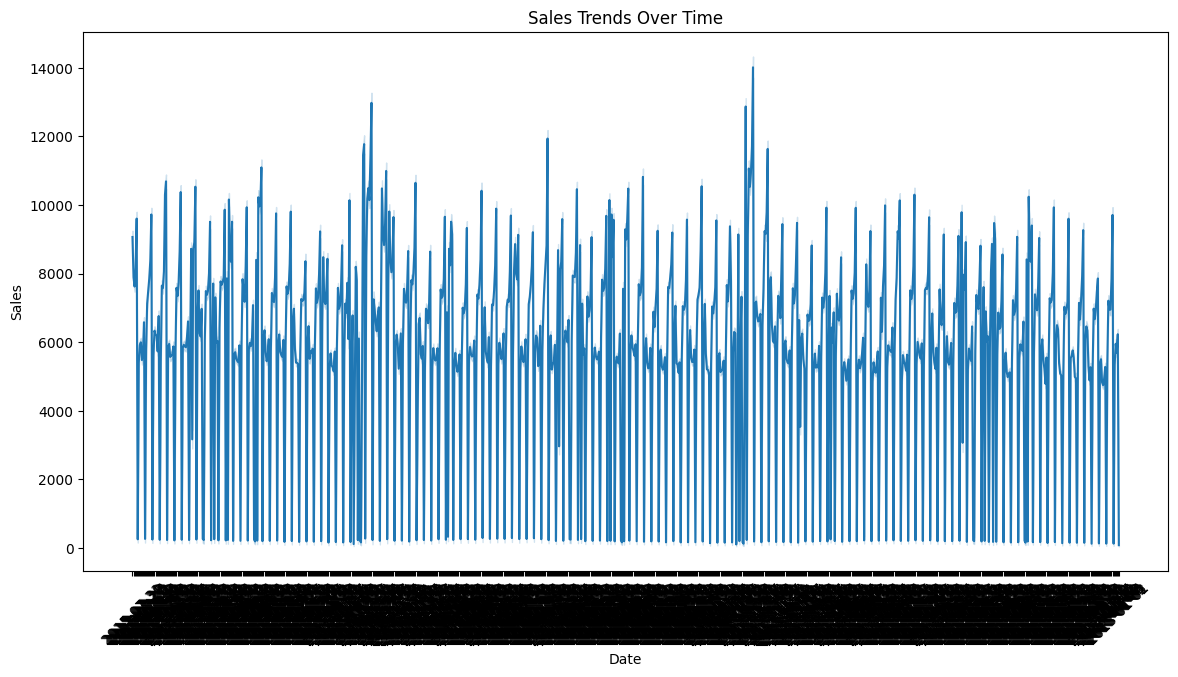

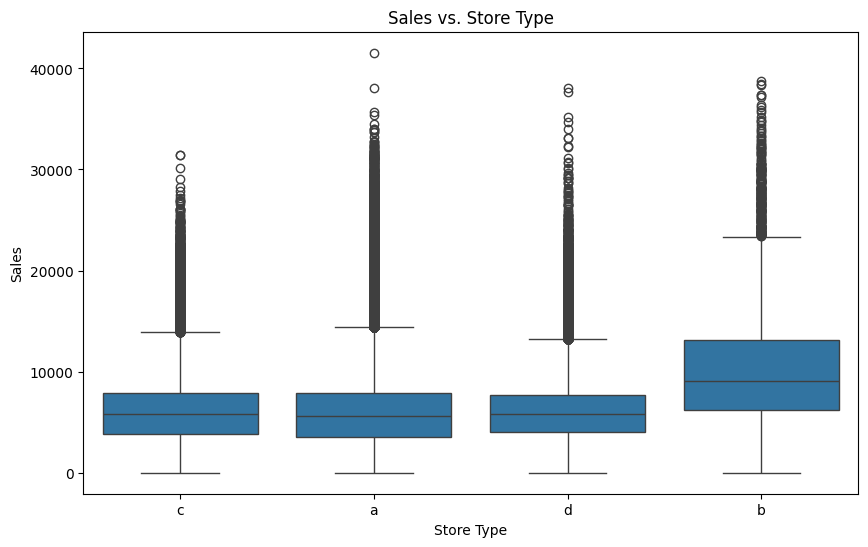

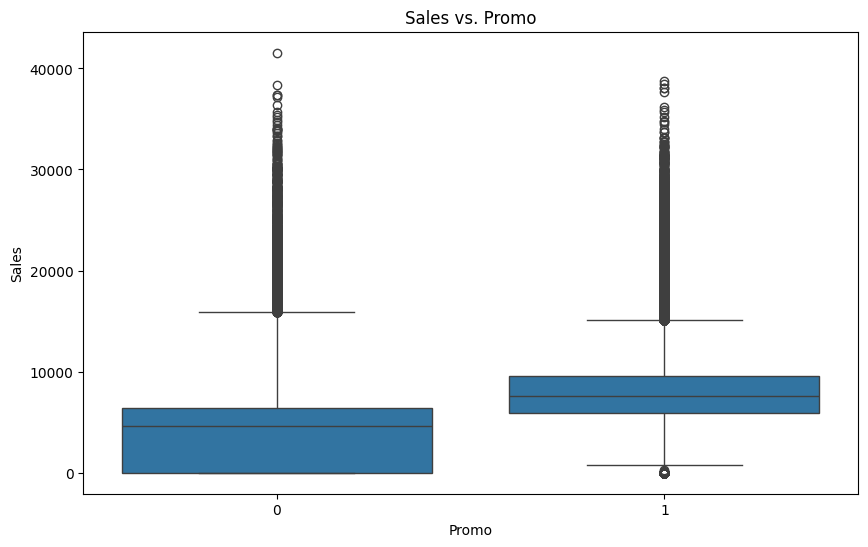

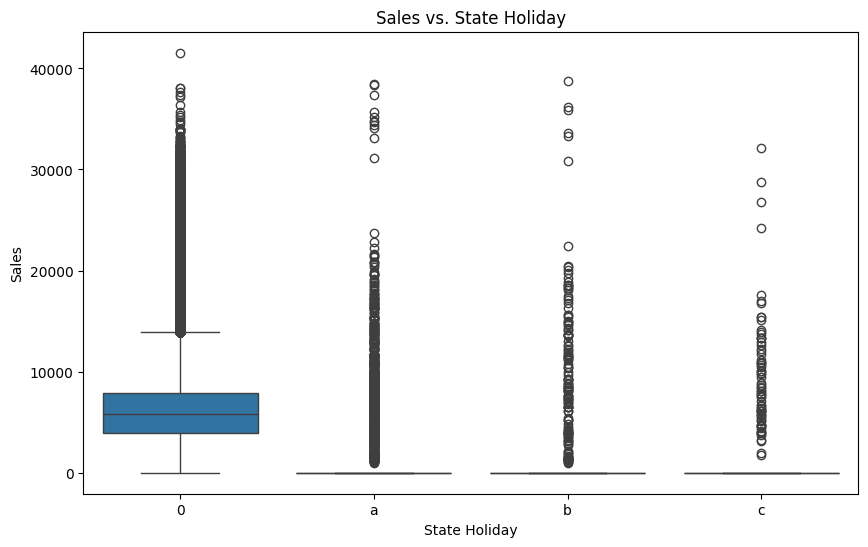

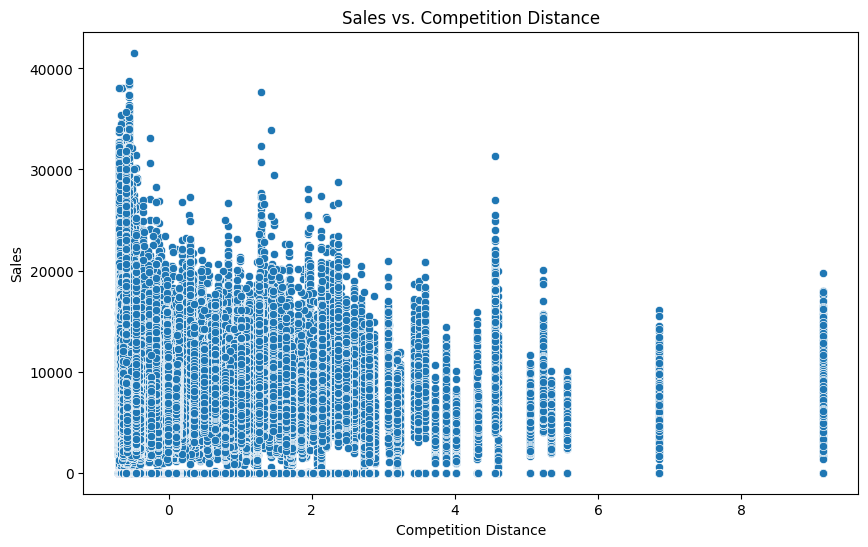

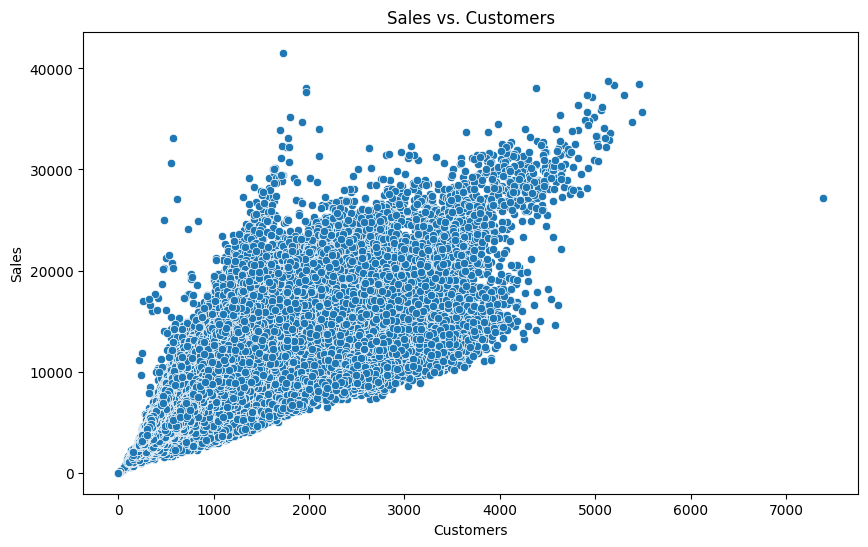

ValueError: could not convert string to float: '2015-07-31'

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_url = "https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/processed_train_data.csv"
data = pd.read_csv(data_url)

# Ensure that only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Display the first few rows of the dataset
print(data.head())

# 1. Sales Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], kde=True, bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# 2. Sales vs. Day of the Week
plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek', y='Sales', data=data)
plt.title('Sales vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

# 3. Sales Trends Over Time
plt.figure(figsize=(14,7))
sns.lineplot(x='Date', y='Sales', data=data)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# 4. Sales vs. Store Type
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales', data=data)
plt.title('Sales vs. Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

# 5. Sales vs. Promo
plt.figure(figsize=(10,6))
sns.boxplot(x='Promo', y='Sales', data=data)
plt.title('Sales vs. Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

# 6. Sales vs. State Holiday
plt.figure(figsize=(10,6))
sns.boxplot(x='StateHoliday', y='Sales', data=data)
plt.title('Sales vs. State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

# 7. Sales vs. Competition Distance
plt.figure(figsize=(10,6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

# 8. Sales vs. Customers
plt.figure(figsize=(10,6))
sns.scatterplot(x='Customers', y='Sales', data=data)
plt.title('Sales vs. Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

# 9. Correlation Heatmap
plt.figure(figsize=(12,8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the data
url = 'https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/processed_train_data.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Select only the sales column
data = data[['Sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define prev_data period
prev_data = 942  # Use past 942 days to predict

# Create sequences of data
def create_sequences(data, prev_data):
    X, y = [], []
    for i in range(len(data) - prev_data):
        X.append(data[i:i + prev_data])
        y.append(data[i + prev_data])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, prev_data)

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(prev_data, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')

# Make predictions
y_pred = model.predict(X_val)

# Inverse transform to original scale
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data.index[prev_data:len(y_val) + prev_data], y_val_inv, label='True Sales')
plt.plot(data.index[prev_data:len(y_val) + prev_data], y_pred_inv, label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Prediction')
plt.legend()
plt.show()

# Forecast future sales for the next 6 weeks (42 days)
forecast_horizon = 42

# Add batch dimension
last_sequence = scaled_data[-prev_data:]
last_sequence = np.expand_dims(last_sequence, axis=0)

forecast = []
for _ in range(forecast_horizon):
    pred = model.predict(last_sequence)
    forecast.append(pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[pred]], axis=1)

forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, closed='right')

# Plot future forecast
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast_inv, label='Forecast Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()

In [ ]:
#Kevin Updated Code to Include Console Updates

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, Callback

# Load and preprocess the data
url = 'https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/processed_train_data.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Select only the sales column
data = data[['Sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define prev_data period
prev_data = 942  # Use past 942 days to predict

# Create sequences of data
def create_sequences(data, prev_data):
    X, y = [], []
    for i in range(len(data) - prev_data):
        X.append(data[i:i + prev_data])
        y.append(data[i + prev_data])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, prev_data)

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(prev_data, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Custom callback for console output
class TrainingLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}/{self.params["epochs"]} - Loss: {logs["loss"]:.4f} - Val Loss: {logs["val_loss"]:.4f}')

# Train the model with early stopping and console output
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
training_logger = TrainingLogger()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, training_logger])

# Evaluate the model
loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')

# Make predictions
y_pred = model.predict(X_val)

# Inverse transform to original scale
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data.index[prev_data:len(y_val) + prev_data], y_val_inv, label='True Sales')
plt.plot(data.index[prev_data:len(y_val) + prev_data], y_pred_inv, label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Prediction')
plt.legend()
plt.show()

# Forecast future sales for the next 6 weeks (42 days)
forecast_horizon = 42

# Add batch dimension
last_sequence = scaled_data[-prev_data:]
last_sequence = np.expand_dims(last_sequence, axis=0)

forecast = []
for _ in range(forecast_horizon):
    pred = model.predict(last_sequence)
    forecast.append(pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[pred]], axis=1)

forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, closed='right')

# Plot future forecast
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast_inv, label='Forecast Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()


In [ ]:
#Kevin (Modified LSTM Model code to include saving predictions into csv files and validation losses and plots into png files)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the data
url = 'https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/processed_train_data.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Select only the sales column
data = data[['Sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define prev_data period
prev_data = 942  # Use past 942 days to predict

# Create sequences of data
def create_sequences(data, prev_data):
    X, y = [], []
    for i in range(len(data) - prev_data):
        X.append(data[i:i + prev_data])
        y.append(data[i + prev_data])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, prev_data)

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(prev_data, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Save training and validation loss to CSV
history_df = pd.DataFrame({
    'Epoch': range(1, len(history.history['loss']) + 1),
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})
loss_history_csv = 'training_validation_loss.csv'
history_df.to_csv(loss_history_csv, index=False)

# Save Loss Plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.close()

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
val_loss = model.evaluate(X_val, y_val, verbose=0)

# Save final model performance metrics to text file
performance_txt = 'model_performance.txt'
with open(performance_txt, 'w') as f:
    f.write(f'Training Loss: {train_loss}\n')
    f.write(f'Validation Loss: {val_loss}\n')

# Save the trained model
model.save('sales_prediction_model.h5')

# Make predictions
y_pred = model.predict(X_val)

# Inverse transform to original scale
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Save results (true vs predicted sales) to CSV
results_df = pd.DataFrame({
    'Date': data.index[prev_data:len(y_val) + prev_data],
    'True Sales': y_val_inv.flatten(),
    'Predicted Sales': y_pred_inv.flatten()
})
results_csv = 'sales_predictions.csv'
results_df.to_csv(results_csv, index=False)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data.index[prev_data:len(y_val) + prev_data], y_val_inv, label='True Sales')
plt.plot(data.index[prev_data:len(y_val) + prev_data], y_pred_inv, label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Prediction')
plt.legend()
plt.savefig('sales_prediction.png')
plt.close()

# Forecast future sales for the next 6 weeks (42 days)
forecast_horizon = 42

# Add batch dimension
last_sequence = scaled_data[-prev_data:]
last_sequence = np.expand_dims(last_sequence, axis=0)

forecast = []
for _ in range(forecast_horizon):
    pred = model.predict(last_sequence)
    forecast.append(pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[pred]], axis=1)

forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, closed='right')

# Save forecast results to CSV
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast Sales': forecast_inv.flatten()
})
forecast_csv = 'sales_forecast.csv'
forecast_df.to_csv(forecast_csv, index=False)

# Plot forecast results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast_inv, label='Forecast Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.savefig('sales_forecast.png')
plt.close()

print(f'Loss history saved to {loss_history_csv}')
print(f'Model performance saved to {performance_txt}')
print(f'Sales predictions saved to {results_csv}')
print(f'Forecast saved to {forecast_csv}')
print(f'Training and validation loss plot saved as training_validation_loss.png')
print(f'Sales prediction plot saved as sales_prediction.png')
print(f'Sales forecast plot saved as sales_forecast.png')


In [ ]:
#shameer, random forest just in case
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load and preprocess the data
url = 'https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/processed_train_data.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Select only the sales column
data = data[['Sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define prev_data period
prev_data = 942  # Use past 942 days to predict

# Create lag features for Random Forest
def create_lag_features(data, prev_data):
    X, y = [], []
    for i in range(len(data) - prev_data):
        X.append(data[i:i + prev_data].flatten())  # Flatten the data
        y.append(data[i + prev_data])
    return np.array(X), np.array(y)

X, y = create_lag_features(scaled_data, prev_data)

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
train_loss = mean_squared_error(y_train, model.predict(X_train))
val_loss = mean_squared_error(y_val, y_pred)
print(f'Training Loss (MSE): {train_loss}')
print(f'Validation Loss (MSE): {val_loss}')

# Save training and validation loss to CSV
history_df = pd.DataFrame({
    'Epoch': ['N/A'],  # Random Forest does not have epochs
    'Training Loss': [train_loss],
    'Validation Loss': [val_loss]
})
loss_history_csv = 'training_validation_loss.csv'
history_df.to_csv(loss_history_csv, index=False)

# Save Loss Plot
plt.figure(figsize=(12, 6))
plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss])
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('training_validation_loss.png')
plt.close()

# Save the trained model
import joblib
joblib.dump(model, 'sales_prediction_model.pkl')

# Make predictions
y_pred = model.predict(X_val)

# Inverse transform to original scale
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Save results (true vs predicted sales) to CSV
results_df = pd.DataFrame({
    'Date': data.index[prev_data:len(y_val) + prev_data],
    'True Sales': y_val_inv.flatten(),
    'Predicted Sales': y_pred_inv.flatten()
})
results_csv = 'sales_predictions.csv'
results_df.to_csv(results_csv, index=False)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data.index[prev_data:len(y_val) + prev_data], y_val_inv, label='True Sales')
plt.plot(data.index[prev_data:len(y_val) + prev_data], y_pred_inv, label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Prediction')
plt.legend()
plt.savefig('sales_prediction.png')
plt.close()

# Forecast future sales for the next 6 weeks (42 days)
forecast_horizon = 42

# Create future predictions
last_sequence = scaled_data[-prev_data:].flatten()
forecast = []

for _ in range(forecast_horizon):
    pred = model.predict(last_sequence.reshape(1, -1))
    forecast.append(pred[0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = pred

forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, closed='right')

# Save forecast results to CSV
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast Sales': forecast_inv.flatten()
})
forecast_csv = 'sales_forecast.csv'
forecast_df.to_csv(forecast_csv, index=False)

# Plot forecast results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast_inv, label='Forecast Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.savefig('sales_forecast.png')
plt.close()

print(f'Loss history saved to {loss_history_csv}')
print(f'Sales predictions saved to {results_csv}')
print(f'Forecast saved to {forecast_csv}')
print(f'Training and validation loss plot saved as training_validation_loss.png')
print(f'Sales prediction plot saved as sales_prediction.png')
print(f'Sales forecast plot saved as sales_forecast.png')


In [ ]:
#JUAN UPDATED FORECAST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

# Load and preprocess the data
print("Loading data...")
url = 'https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/processed_train_data.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
print("Data loaded successfully.")

# Select only the sales column and use a smaller subset for testing
data = data[['Sales']].head(10000)  # Example: use only the first 10,000 rows

# Normalize the data
print("Normalizing data...")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
print("Data normalized.")

# Define prev_data period
prev_data = 942  # Use past 942 days to predict

# Create features and target variables
print("Creating features and target variables...")
def create_features_target(data, prev_data):
    X, y = [], []
    for i in range(prev_data, len(data)):
        X.append(data[i-prev_data:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y).ravel()  # Flatten y to 1D array

X, y = create_features_target(scaled_data, prev_data)
print("Features and target variables created.")

# Split into training and validation sets
print("Splitting data into training and validation sets...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split successfully.")

# Initialize and train the Random Forest model with regularization
print("Training Random Forest model...")
model = RandomForestRegressor(
    n_estimators=50,          # Reduced number of trees
    max_depth=10,             # Limit the maximum depth of the trees
    min_samples_split=10,     # Increase the minimum number of samples required to split a node
    min_samples_leaf=5,       # Increase the minimum number of samples required to be at a leaf node
    max_features='sqrt',      # Consider sqrt(number of features) when looking for the best split
    random_state=42
)
model.fit(X_train, y_train)
print("Model trained successfully.")

# Cross-validation to assess the model
print("Performing cross-validation...")
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-validated MSE: {cv_mse}")

# Make predictions and calculate performance metrics
print("Making predictions...")
y_pred = model.predict(X_val)
train_loss = mean_squared_error(y_train, model.predict(X_train))
val_loss = mean_squared_error(y_val, y_pred)

# Save performance metrics
performance_txt = 'model_performance.txt'
with open(performance_txt, 'w') as f:
    f.write(f'Training Loss (MSE): {train_loss}\n')
    f.write(f'Validation Loss (MSE): {val_loss}\n')
    f.write(f'Cross-validated MSE: {cv_mse}\n')
print(f"Performance metrics saved to {performance_txt}.")

# Save training and validation loss to CSV
loss_history_df = pd.DataFrame({
    'Metric': ['Training Loss', 'Validation Loss', 'Cross-validated MSE'],
    'Value': [train_loss, val_loss, cv_mse]
})
loss_history_csv = 'training_validation_loss.csv'
loss_history_df.to_csv(loss_history_csv, index=False)
print(f"Training and validation loss saved to {loss_history_csv}.")

# Save the trained model
print("Saving the trained model...")
model_filename = 'sales_prediction_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}.")

# General Forecast for the Next 42 Days
def forecast_sales(model, scaler, last_sequence, start_date, forecast_horizon=42):
    forecast = []
    for _ in range(forecast_horizon):
        pred = model.predict(last_sequence)
        forecast.append(pred[0])
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[0, -1] = pred[0]

    forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    future_dates = pd.date_range(start=start_date + pd.Timedelta(days=1), periods=forecast_horizon)
    return future_dates, forecast_inv

# Forecast future sales starting from the last date in the dataset
print("Forecasting future sales...")
last_sequence = scaled_data[-prev_data:].flatten().reshape(1, -1)
last_date = data.index[-1]
future_dates, forecast_inv = forecast_sales(model, scaler, last_sequence, last_date)

# Save forecast results to CSV
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast Sales': forecast_inv.flatten()
})
forecast_csv = 'sales_forecast.csv'
forecast_df.to_csv(forecast_csv, index=False)
print(f"Forecast results saved to {forecast_csv}.")

# Plot forecast results
print("Plotting sales forecast...")
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast_inv, label='Forecast Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('42-Day Sales Forecast')
plt.legend()
plt.savefig('sales_forecast.png')
plt.close()
print("Sales forecast plot saved as sales_forecast.png.")

# Forecast sales for 42 days after 2015-07-31
print("Forecasting future sales after 2015-07-31...")
last_sequence = scaled_data[-prev_data:].flatten().reshape(1, -1)
specific_last_date = pd.Timestamp('2015-07-31')
future_dates, forecast_inv = forecast_sales(model, scaler, last_sequence, specific_last_date)

# Save forecast results to CSV
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast Sales': forecast_inv.flatten()
})
forecast_csv = 'sales_forecast_after_2015-07-31.csv'
forecast_df.to_csv(forecast_csv, index=False)
print(f"Forecast results saved to {forecast_csv}.")

# Plot forecast results
print("Plotting sales forecast after 2015-07-31...")
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast_inv, label='Forecast Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('42-Day Sales Forecast After 2015-07-31')
plt.legend()
plt.savefig('sales_forecast_after_2015-07-31.png')
plt.close()
print("Sales forecast plot saved as sales_forecast_after_2015-07-31.png.")

print("All tasks completed successfully.")


Original Data:
         Date  Forecast Sales
0  2015-08-01     6219.516792
1  2015-08-02     7384.853973
2  2015-08-03     4883.366891
3  2015-08-04     4934.977710
4  2015-08-05     7038.757402

Cleaned Data:
        Date  Forecast Sales
0 2015-08-01     6219.516792
1 2015-08-02     7384.853973
2 2015-08-03     4883.366891
3 2015-08-04     4934.977710
4 2015-08-05     7038.757402


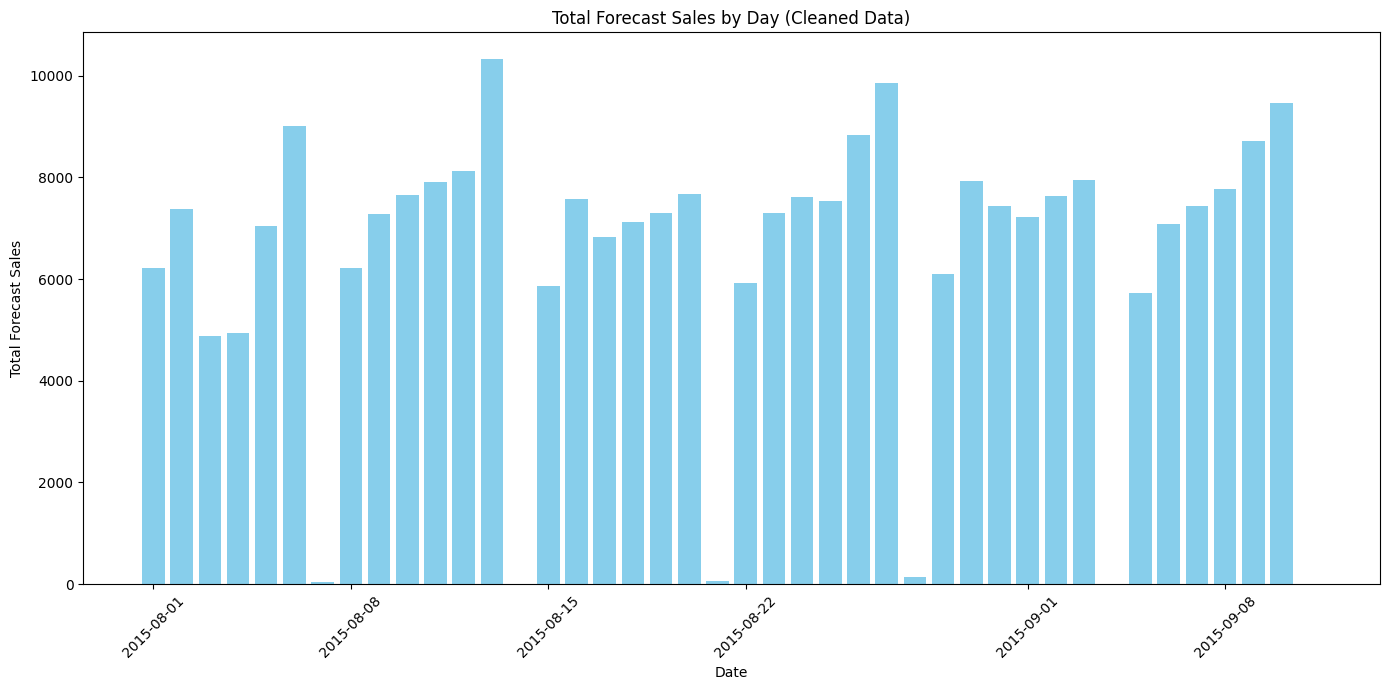

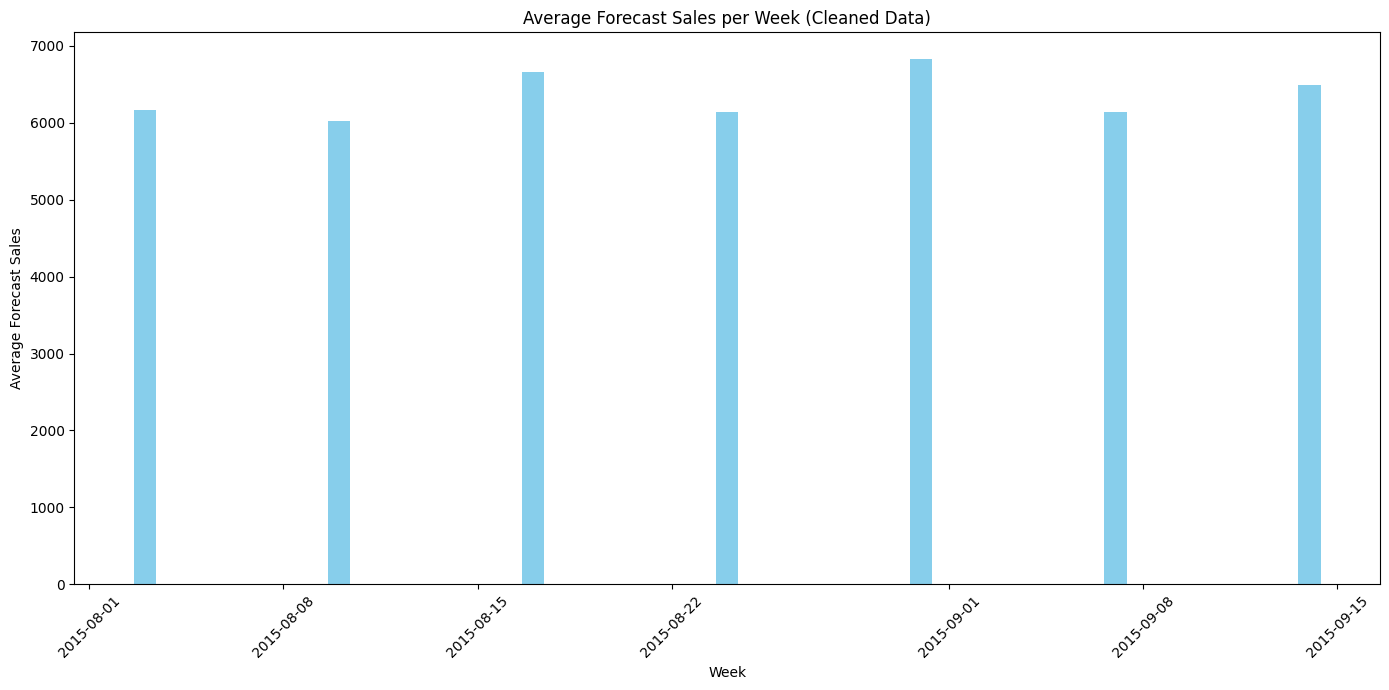

In [ ]:
# Shameer,  cleaning sales forecast csv generated by machine learning model and perofrming EDA

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from GitHub raw URL
file_url = "https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/Random_Forest_v2/sales_forecast_after_2015-07-31.csv"
data = pd.read_csv(file_url)

# Display the first few rows of the original data
print("Original Data:")
print(data.head())

# Step 1: Handle missing values
data_cleaned = data.dropna()  # Drop rows with missing values

# Step 2: Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Step 3: Ensure 'Date' column is in datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Step 4: Remove rows with invalid dates (if any)
data_cleaned = data_cleaned.dropna(subset=['Date'])

# Step 5: Sort data by date
data_cleaned = data_cleaned.sort_values(by='Date')

# Display the cleaned data
print("\nCleaned Data:")
print(data_cleaned.head())

# Plot 1: Total Forecast Sales by Day
daily_sales = data_cleaned.groupby('Date')['Forecast Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.bar(daily_sales['Date'], daily_sales['Forecast Sales'], color='skyblue')
plt.title('Total Forecast Sales by Day (Cleaned Data)')
plt.xlabel('Date')
plt.ylabel('Total Forecast Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average Forecast Sales per Week
weekly_sales = data_cleaned.resample('W-Mon', on='Date')['Forecast Sales'].mean().reset_index().sort_values(by='Date')

plt.figure(figsize=(14, 7))
plt.bar(weekly_sales['Date'], weekly_sales['Forecast Sales'], color='skyblue')
plt.title('Average Forecast Sales per Week (Cleaned Data)')
plt.xlabel('Week')
plt.ylabel('Average Forecast Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
